# Análise de Dados: TDI Brasil Regiões UFs 2024

Este projeto reproduz o processamento e análise dos dados que estão no arquivo `TDI_BRASIL_REGIOES_UFS_2024.xlsx`.

Serão analisadas as informações sobre a Taxa de Distorção Idade-Série para Brasil, regiões e UFs.



In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import warnings

# Configurações para melhor exibição dos gráficos em português
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 12})
sns.set_style("whitegrid")

# Configurando o estilo dos gráficos
plt.style.use('ggplot')
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Aumentando o tamanho das figuras para melhor visualização
plt.rcParams['figure.figsize'] = (12, 8)

## Carregamento e Análise Inicial da Estrutura dos Dados

Carregar o arquivo Excel e analisar sua estrutura para entender como melhor processá-lo.

In [2]:
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl.worksheet.header_footer")

# Criando pasta para salvar os resultados
pasta_resultados = 'Resultados_TDI'
if not os.path.exists(pasta_resultados):
    os.makedirs(pasta_resultados)

# Verificando as abas disponíveis no arquivo Excel
arquivo_excel = os.path.join('Datasets', 'TDI_BRASIL_REGIOES_UFS_2024.xlsx')
xl = pd.ExcelFile(arquivo_excel)
print(f"Abas disponíveis no arquivo: {xl.sheet_names}")

# Lendo o arquivo Excel - usando a linha 4 como cabeçalho na aba principal
dados = pd.read_excel(arquivo_excel, sheet_name='BRASIL_REGIÕES_UFS', header=4, skiprows=[5])

# Exibindo as primeiras linhas para verificar a estrutura
dados.head()


Abas disponíveis no arquivo: ['BRASIL_REGIÕES_UFS', 'Planilha1']


,"Taxa de Distorção Idade-Série por Localização e Dependência Administrativa, nos Níveis de Ensino Fundamental e Médio - Brasil, Regiões Geográficas e Unidades da Federação - 2024",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,NaN,NaN,NaN,Total,Anos Iniciais,Anos Finais,1º Ano,2º Ano,3º Ano,...,5º Ano,6º Ano,7º Ano,8º Ano,9º Ano,Total,1ª Série,2ª Série,3ª Série,4ª Série
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NU_ANO_CENSO,UNIDGEO,NO_CATEGORIA,NO_DEPENDENCIA,FUN_CAT_0,FUN_AI_CAT_0,FUN_AF_CAT_0,FUN_01_CAT_0,FUN_02_CAT_0,FUN_03_CAT_0,...,FUN_05_CAT_0,FUN_06_CAT_0,FUN_07_CAT_0,FUN_08_CAT_0,FUN_09_CAT_0,MED_CAT_0,MED_01_CAT_0,MED_02_CAT_0,MED_03_CAT_0,MED_04_CAT_0
3,2024,Brasil,Total,Total,10.9,7.1,15.7,2.1,4.2,8.1,...,11.1,15,15.9,16.2,15.6,17.8,20.4,17.6,14.7,29.4
4,2024,Brasil,Urbana,Total,10.1,6.7,14.4,2,4.1,7.7,...,10,13.7,14.7,15,14.3,17.2,19.9,16.9,13.9,29


In [3]:
# Renomeando as colunas para facilitar a análise
colunas = ['ANO', 'UNIDADE_GEOGRAFICA', 'LOCALIZACAO', 'DEPENDENCIA_ADMINISTRATIVA', 
           'EF_TOTAL', 'EF_ANOS_INICIAIS', 'EF_ANOS_FINAIS', 
           'EF_1ANO', 'EF_2ANO', 'EF_3ANO', 'EF_4ANO', 'EF_5ANO', 
           'EF_6ANO', 'EF_7ANO', 'EF_8ANO', 'EF_9ANO', 
           'EM_TOTAL', 'EM_1SERIE', 'EM_2SERIE', 'EM_3SERIE', 'EM_4SERIE']

# Verifica se o número de colunas lidas corresponde ao esperado
if len(dados.columns) == len(colunas):
    dados.columns = colunas
    print("Colunas renomeadas com sucesso.")
else:
    # Se o número de colunas for diferente, use os nomes gerados automaticamente
    print(f"Aviso: número de colunas esperadas ({len(colunas)}) é diferente do número de colunas lidas ({len(dados.columns)})")
    print("Usando os nomes de colunas originais.")
    print(f"Colunas lidas: {dados.columns.tolist()}")

# Ajustando os tipos de dados
for coluna in dados.columns[4:]:
    # Tenta converter para números, colocando NaN onde não for possível
    dados[coluna] = pd.to_numeric(dados[coluna], errors='coerce')

# Verificando as informações do DataFrame após a preparação
dados.info()

Colunas renomeadas com sucesso.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ANO                         589 non-null    object 
 1   UNIDADE_GEOGRAFICA          588 non-null    object 
 2   LOCALIZACAO                 588 non-null    object 
 3   DEPENDENCIA_ADMINISTRATIVA  588 non-null    object 
 4   EF_TOTAL                    542 non-null    float64
 5   EF_ANOS_INICIAIS            522 non-null    float64
 6   EF_ANOS_FINAIS              538 non-null    float64
 7   EF_1ANO                     522 non-null    float64
 8   EF_2ANO                     521 non-null    float64
 9   EF_3ANO                     521 non-null    float64
 10  EF_4ANO                     521 non-null    float64
 11  EF_5ANO                     522 non-null    float64
 12  EF_6ANO                     537 non-null    float64
 13  EF_

In [4]:
# Estatísticas descritivas para as variáveis numéricas
print("Estatísticas descritivas das taxas de distorção:")
descritivas = dados.iloc[:, 4:].describe()
descritivas

# Verificando valores ausentes
print("\nValores ausentes por coluna:")
valores_ausentes = dados.isnull().sum()
valores_ausentes

Estatísticas descritivas das taxas de distorção:

Valores ausentes por coluna:


ANO                             3
UNIDADE_GEOGRAFICA              4
LOCALIZACAO                     4
DEPENDENCIA_ADMINISTRATIVA      4
EF_TOTAL                       50
EF_ANOS_INICIAIS               70
EF_ANOS_FINAIS                 54
EF_1ANO                        70
EF_2ANO                        71
EF_3ANO                        71
EF_4ANO                        71
EF_5ANO                        70
EF_6ANO                        55
EF_7ANO                        54
EF_8ANO                        54
EF_9ANO                        54
EM_TOTAL                       52
EM_1SERIE                      52
EM_2SERIE                      53
EM_3SERIE                      54
EM_4SERIE                     295
dtype: int64

Taxa média de distorção por região:


,EF_TOTAL,EM_TOTAL
UNIDADE_GEOGRAFICA,,
Acre,15.683333,18.620000
Alagoas,14.020000,18.580000
Amapá,19.620000,24.680000
Amazonas,11.500000,20.780000
Bahia,19.633333,26.800000
Brasil,10.383333,16.400000
Ceará,6.983333,13.180000
Centro-Oeste,8.883333,13.266667
Distrito Federal,9.480000,16.460000


<Figure size 1000x600 with 0 Axes>

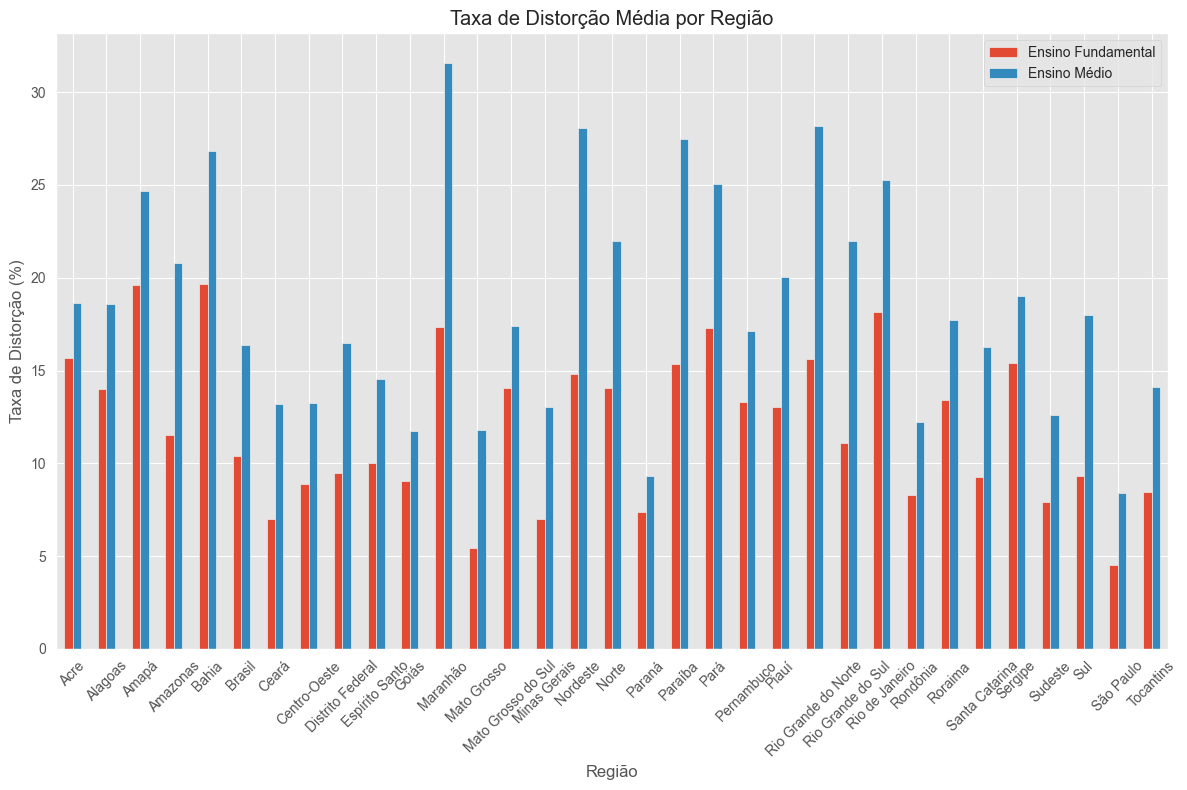

In [5]:
# Análise simples usando groupby - agrupando por região
print("Taxa média de distorção por região:")
taxa_por_regiao = dados[dados['LOCALIZACAO'] == 'Total'].groupby('UNIDADE_GEOGRAFICA')[['EF_TOTAL', 'EM_TOTAL']].mean()
display(taxa_por_regiao)

# Criando um gráfico simples para visualizar o resultado
plt.figure(figsize=(10, 6))
taxa_por_regiao.plot(kind='bar')
plt.title('Taxa de Distorção Média por Região')
plt.ylabel('Taxa de Distorção (%)')
plt.xlabel('Região')
plt.xticks(rotation=45)
plt.legend(['Ensino Fundamental', 'Ensino Médio'])
plt.tight_layout()
plt.show()

In [6]:
# Filtrar apenas os dados por região (sem os dados de estados)
regioes = ['Brasil', 'Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']
dados_regioes = dados[dados['UNIDADE_GEOGRAFICA'].isin(regioes)]

# Para cada região, mostrar as taxas totais de Ensino Fundamental e Médio
print("Taxa de Distorção por Região:")
tabela_regioes = dados_regioes[dados_regioes['LOCALIZACAO'] == 'Total']
tabela_regioes = tabela_regioes[tabela_regioes['DEPENDENCIA_ADMINISTRATIVA'] == 'Total']
tabela_regioes = tabela_regioes[['UNIDADE_GEOGRAFICA', 'EF_TOTAL', 'EM_TOTAL']].copy()
tabela_regioes

Taxa de Distorção por Região:


,UNIDADE_GEOGRAFICA,EF_TOTAL,EM_TOTAL
3,Brasil,10.9,17.8
21,Norte,17.6,26.8
39,Nordeste,14.1,22.2
57,Sudeste,7.5,13.9
75,Sul,9.3,16.0
93,Centro-Oeste,9.9,15.0


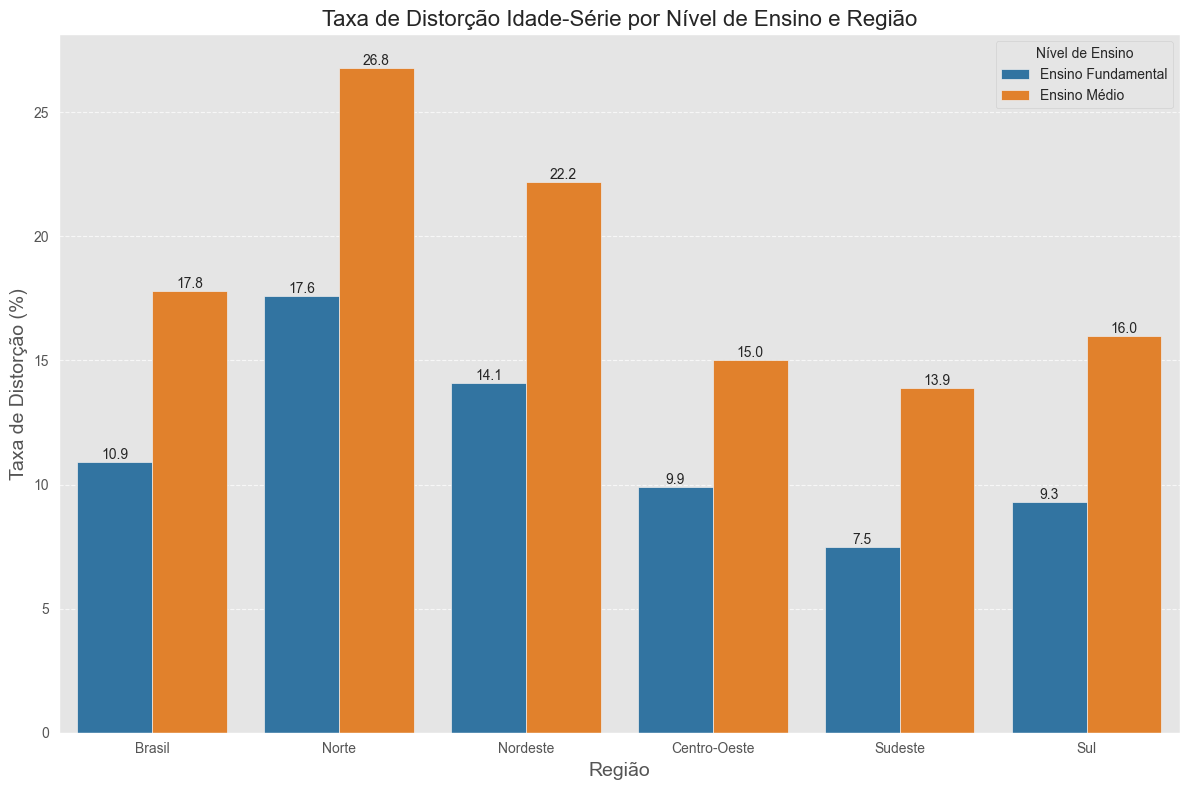

In [7]:
# Gráfico de barras para comparar EF e EM por região
tabela_pivot = pd.melt(tabela_regioes, 
                      id_vars=['UNIDADE_GEOGRAFICA'], 
                      value_vars=['EF_TOTAL', 'EM_TOTAL'],
                      var_name='Nível de Ensino', 
                      value_name='Taxa de Distorção')

# Renomeando para melhor visualização
tabela_pivot['Nível de Ensino'] = tabela_pivot['Nível de Ensino'].map({
    'EF_TOTAL': 'Ensino Fundamental', 
    'EM_TOTAL': 'Ensino Médio'
})

# Ordenar regiões
ordem_regioes = ['Brasil', 'Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul']
tabela_pivot['UNIDADE_GEOGRAFICA'] = pd.Categorical(
    tabela_pivot['UNIDADE_GEOGRAFICA'], 
    categories=ordem_regioes, 
    ordered=True
)
tabela_pivot = tabela_pivot.sort_values('UNIDADE_GEOGRAFICA')

# Plotar o gráfico de barras agrupado
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='UNIDADE_GEOGRAFICA', y='Taxa de Distorção', hue='Nível de Ensino', 
                data=tabela_pivot, palette=['#1f77b4', '#ff7f0e'])

plt.title('Taxa de Distorção Idade-Série por Nível de Ensino e Região', fontsize=16)
plt.xlabel('Região', fontsize=14)
plt.ylabel('Taxa de Distorção (%)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar os valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=10)

plt.tight_layout()
plt.savefig(f'{pasta_resultados}/taxa_distorcao_por_regiao.png')
plt.show()

In [8]:
# Filtrando apenas os dados do Brasil
dados_brasil = dados[dados['UNIDADE_GEOGRAFICA'] == 'Brasil']
dados_brasil = dados_brasil[dados_brasil['LOCALIZACAO'] == 'Total']
dados_brasil = dados_brasil[dados_brasil['DEPENDENCIA_ADMINISTRATIVA'] == 'Total']

# Extraindo os dados para cada etapa do Ensino Fundamental
ef_colunas = ['EF_1ANO', 'EF_2ANO', 'EF_3ANO', 'EF_4ANO', 'EF_5ANO', 
              'EF_6ANO', 'EF_7ANO', 'EF_8ANO', 'EF_9ANO']
ef_anos = ['1º Ano', '2º Ano', '3º Ano', '4º Ano', '5º Ano', 
           '6º Ano', '7º Ano', '8º Ano', '9º Ano']

ef_dados = dados_brasil[ef_colunas].iloc[0].tolist()
print("Taxa de Distorção no Ensino Fundamental por Ano:")
for ano, taxa in zip(ef_anos, ef_dados):
    print(f"{ano}: {taxa:.1f}%")

# Criando um DataFrame para melhor visualização
df_ef = pd.DataFrame({'Ano': ef_anos, 'Taxa de Distorção (%)': ef_dados})
df_ef

Taxa de Distorção no Ensino Fundamental por Ano:
1º Ano: 2.1%
2º Ano: 4.2%
3º Ano: 8.1%
4º Ano: 9.9%
5º Ano: 11.1%
6º Ano: 15.0%
7º Ano: 15.9%
8º Ano: 16.2%
9º Ano: 15.6%


,Ano,Taxa de Distorção (%)
0,1º Ano,2.1
1,2º Ano,4.2
2,3º Ano,8.1
3,4º Ano,9.9
4,5º Ano,11.1
5,6º Ano,15.0
6,7º Ano,15.9
7,8º Ano,16.2
8,9º Ano,15.6


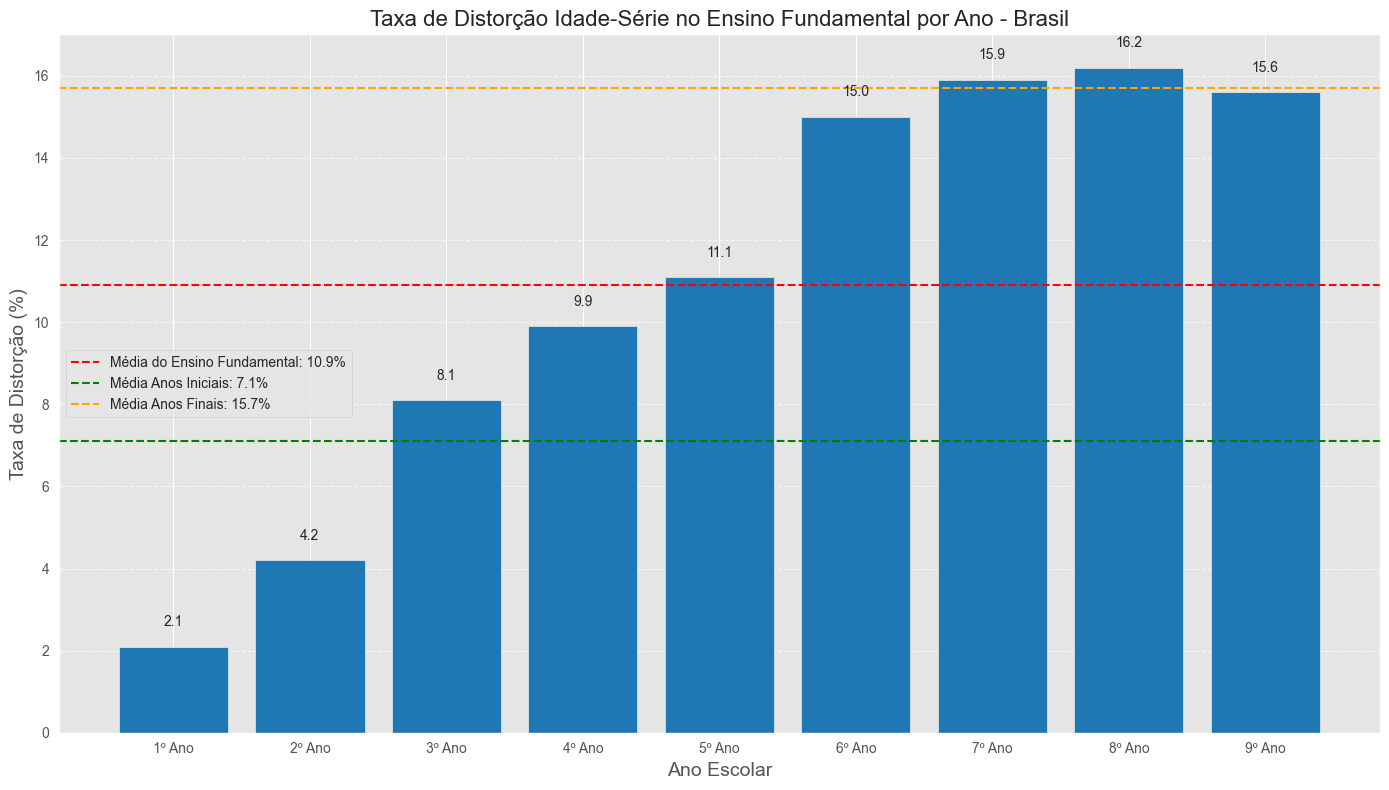

In [9]:
# Gráfico para o Ensino Fundamental
plt.figure(figsize=(14, 8))
plt.bar(ef_anos, ef_dados, color='#1f77b4')
plt.axhline(y=dados_brasil['EF_TOTAL'].iloc[0], color='red', linestyle='--', 
            label=f'Média do Ensino Fundamental: {dados_brasil["EF_TOTAL"].iloc[0]:.1f}%')
plt.axhline(y=dados_brasil['EF_ANOS_INICIAIS'].iloc[0], color='green', linestyle='--', 
            label=f'Média Anos Iniciais: {dados_brasil["EF_ANOS_INICIAIS"].iloc[0]:.1f}%')
plt.axhline(y=dados_brasil['EF_ANOS_FINAIS'].iloc[0], color='orange', linestyle='--', 
            label=f'Média Anos Finais: {dados_brasil["EF_ANOS_FINAIS"].iloc[0]:.1f}%')

plt.title('Taxa de Distorção Idade-Série no Ensino Fundamental por Ano - Brasil', fontsize=16)
plt.xlabel('Ano Escolar', fontsize=14)
plt.ylabel('Taxa de Distorção (%)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar os valores nas barras
for i, valor in enumerate(ef_dados):
    plt.text(i, valor + 0.5, f'{valor:.1f}', ha='center', fontsize=10)

plt.legend()
plt.tight_layout()
plt.savefig(f'{pasta_resultados}/distorcao_ensino_fundamental.png')
plt.show()

In [10]:
# Extraindo dados para o Ensino Médio
em_colunas = ['EM_1SERIE', 'EM_2SERIE', 'EM_3SERIE', 'EM_4SERIE']
em_series = ['1ª Série', '2ª Série', '3ª Série', '4ª Série']

em_dados = dados_brasil[em_colunas].iloc[0].tolist()
print("Taxa de Distorção no Ensino Médio por Série:")
for serie, taxa in zip(em_series, em_dados):
    if not np.isnan(taxa):
        print(f"{serie}: {taxa:.1f}%")

# Removendo valores NaN para o gráfico e para o DataFrame
em_series_validos = []
em_dados_validos = []

for serie, taxa in zip(em_series, em_dados):
    if not np.isnan(taxa):
        em_series_validos.append(serie)
        em_dados_validos.append(taxa)

# Criando um DataFrame para melhor visualização
df_em = pd.DataFrame({'Série': em_series_validos, 'Taxa de Distorção (%)': em_dados_validos})
df_em

Taxa de Distorção no Ensino Médio por Série:
1ª Série: 20.4%
2ª Série: 17.6%
3ª Série: 14.7%
4ª Série: 29.4%


,Série,Taxa de Distorção (%)
0,1ª Série,20.4
1,2ª Série,17.6
2,3ª Série,14.7
3,4ª Série,29.4


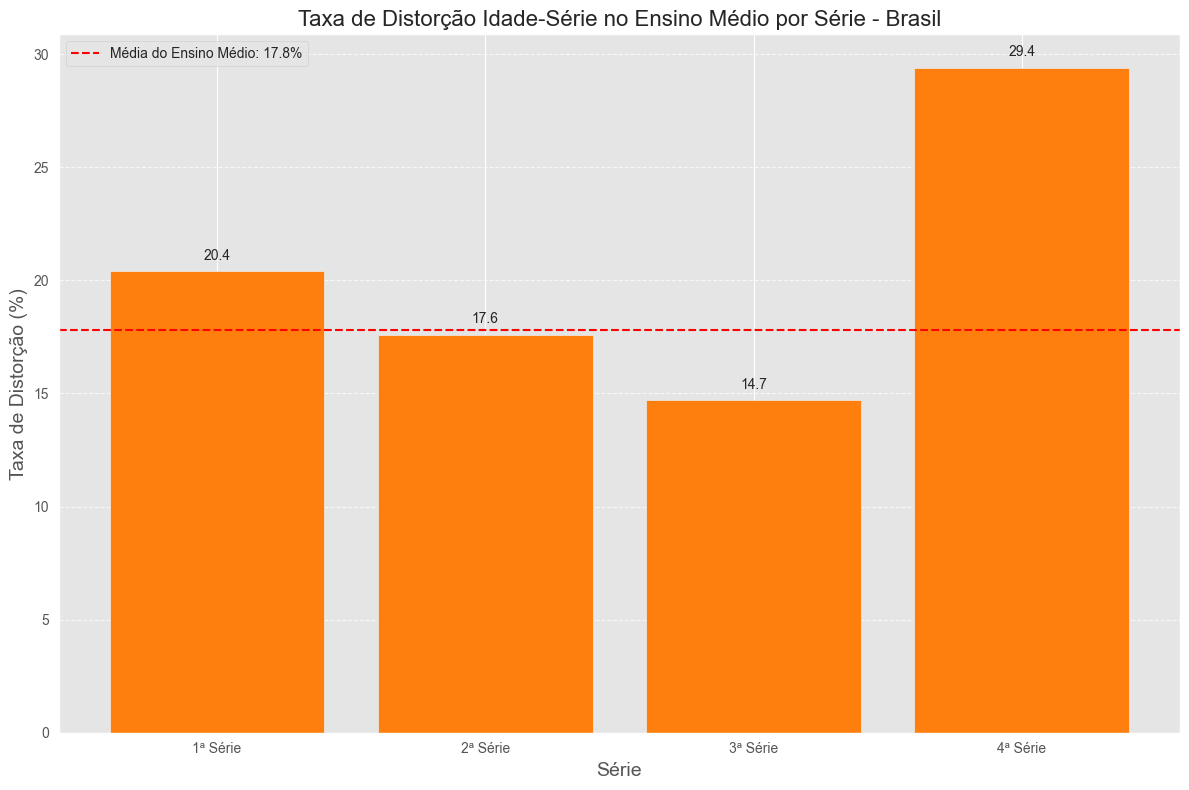

In [11]:
# Gráfico para o Ensino Médio
plt.figure(figsize=(12, 8))
plt.bar(em_series_validos, em_dados_validos, color='#ff7f0e')
plt.axhline(y=dados_brasil['EM_TOTAL'].iloc[0], color='red', linestyle='--', 
            label=f'Média do Ensino Médio: {dados_brasil["EM_TOTAL"].iloc[0]:.1f}%')

plt.title('Taxa de Distorção Idade-Série no Ensino Médio por Série - Brasil', fontsize=16)
plt.xlabel('Série', fontsize=14)
plt.ylabel('Taxa de Distorção (%)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar os valores nas barras
for i, valor in enumerate(em_dados_validos):
    plt.text(i, valor + 0.5, f'{valor:.1f}', ha='center', fontsize=10)

plt.legend()
plt.tight_layout()
plt.savefig(f'{pasta_resultados}/distorcao_ensino_medio.png')
plt.show()

In [12]:
# Comparativo das Taxas de Distorção Idade-Série entre níveis de ensino

# Criar um DataFrame para comparar os diferentes níveis de ensino
comparativo = pd.DataFrame({
    'Nível de Ensino': ['Ensino Fundamental - Anos Iniciais', 
                        'Ensino Fundamental - Anos Finais',
                        'Ensino Médio'],
    'Taxa de Distorção (%)': [dados_brasil['EF_ANOS_INICIAIS'].iloc[0], 
                              dados_brasil['EF_ANOS_FINAIS'].iloc[0], 
                              dados_brasil['EM_TOTAL'].iloc[0]]
})

# Exibir a tabela de comparativo
print("Comparativo da Taxa de Distorção Idade-Série por Nível de Ensino - Brasil")
display(comparativo)


Comparativo da Taxa de Distorção Idade-Série por Nível de Ensino - Brasil


,Nível de Ensino,Taxa de Distorção (%)
0,Ensino Fundamental - Anos Iniciais,7.1
1,Ensino Fundamental - Anos Finais,15.7
2,Ensino Médio,17.8


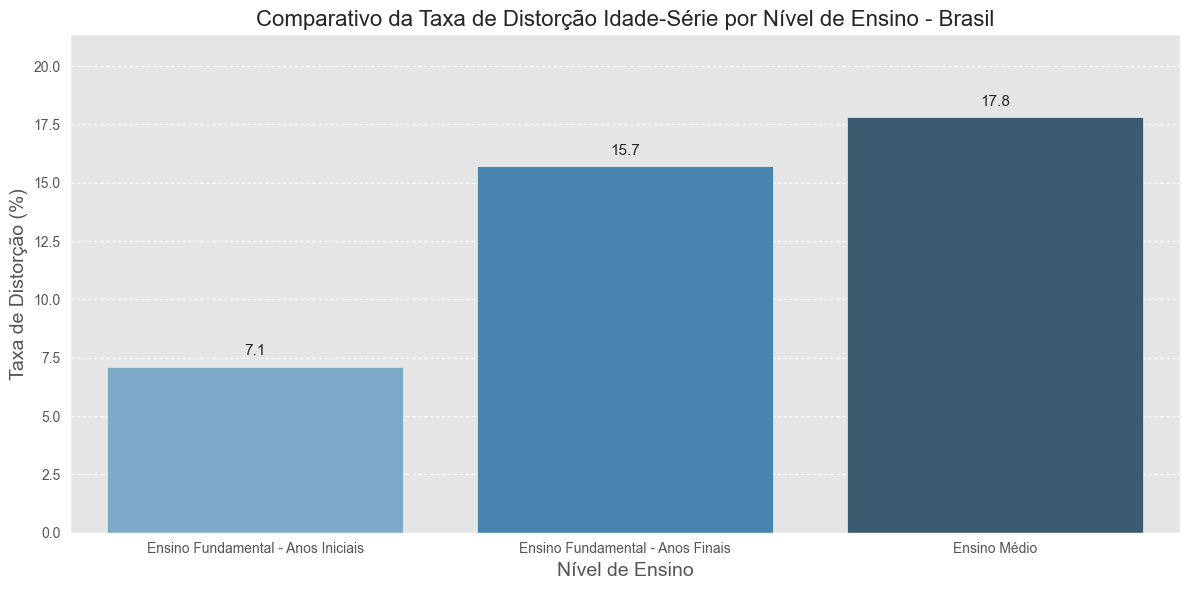

In [13]:
# Criar um gráfico de barras para o comparativo
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Nível de Ensino', y='Taxa de Distorção (%)', data=comparativo, hue='Nível de Ensino', palette='Blues_d', legend=False)

# Adicionar os valores nas barras
for i, valor in enumerate(comparativo['Taxa de Distorção (%)']):
    ax.text(i, valor + 0.5, f'{valor:.1f}', ha='center', fontsize=11)

# Configurar o gráfico
plt.title('Comparativo da Taxa de Distorção Idade-Série por Nível de Ensino - Brasil', fontsize=16)
plt.xlabel('Nível de Ensino', fontsize=14)
plt.ylabel('Taxa de Distorção (%)', fontsize=14)
plt.ylim(0, comparativo['Taxa de Distorção (%)'].max() * 1.2)  # Ajustar altura do gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Salvar o gráfico
plt.savefig(f'{pasta_resultados}/comparativo_niveis_ensino.png')
plt.show()

# Calcular crescimento percentual entre os níveis
ef_anos_iniciais = dados_brasil['EF_ANOS_INICIAIS'].iloc[0]
ef_anos_finais = dados_brasil['EF_ANOS_FINAIS'].iloc[0]
em_total = dados_brasil['EM_TOTAL'].iloc[0]

crescimento_ef_iniciais_finais = ((ef_anos_finais - ef_anos_iniciais) / ef_anos_iniciais) * 100
crescimento_ef_finais_em = ((em_total - ef_anos_finais) / ef_anos_finais) * 100


## Análise do Comparativo:
• A Taxa de Distorção Idade-Série cresce 121.1% dos Anos Iniciais para os Anos Finais do Ensino Fundamental.

• A Taxa de Distorção Idade-Série cresce 13.4% dos Anos Finais do Ensino Fundamental para o Ensino Médio.

• O Ensino Médio apresenta a maior Taxa de Distorção Idade-Série (17.8%), indicando que o problema se intensifica à medida que os estudantes avançam no sistema educacional.

## Implicações e Considerações:
• O aumento progressivo da distorção idade-série sugere um efeito cumulativo de reprovações e abandonos ao longo da trajetória escolar.

• As transições entre níveis de ensino (do fundamental para o médio) parecem ser momentos críticos onde a distorção se intensifica.

• Políticas educacionais específicas podem ser necessárias para cada etapa, com atenção especial ao Ensino Médio, onde o problema é mais acentuado.

In [18]:
# Criando um arquivo Excel simples com os dados analisados
import pandas as pd

# Caminho para salvar o arquivo Excel
excel_path = f'{pasta_resultados}/distorcao_idade_serie.xlsx'

# Criar um DataFrame para o Ensino Fundamental
df_ef = pd.DataFrame({
    'Ano Escolar': ef_anos,
    'Taxa de Distorção (%)': ef_dados
})

# Criar DataFrame para o comparativo entre níveis de ensino
comparativo = pd.DataFrame({
    'Nível de Ensino': ['Ensino Fundamental - Anos Iniciais', 
                        'Ensino Fundamental - Anos Finais',
                        'Ensino Médio'],
    'Taxa de Distorção (%)': [dados_brasil['EF_ANOS_INICIAIS'].iloc[0], 
                              dados_brasil['EF_ANOS_FINAIS'].iloc[0], 
                              dados_brasil['EM_TOTAL'].iloc[0]]
})

# Criar o arquivo Excel 
with pd.ExcelWriter(excel_path, engine='openpyxl') as writer:
    # Planilha 1: Dados gerais do Brasil
    dados_brasil.to_excel(writer, sheet_name='Dados Brasil', index=False)
    
    # Planilha 2: Ensino Fundamental por ano
    df_ef.to_excel(writer, sheet_name='Ensino Fundamental', index=False)
    
    # Planilha 3: Ensino Médio por série
    df_em.to_excel(writer, sheet_name='Ensino Médio', index=False)
    
    # Planilha 4: Comparativo entre níveis de ensino
    comparativo.to_excel(writer, sheet_name='Comparativo', index=False)

print(f"Arquivo Excel salvo com sucesso em: {excel_path}")
print("O arquivo contém os dados do Brasil, Ensino Fundamental, Ensino Médio e um comparativo entre níveis de ensino.")

Arquivo Excel salvo com sucesso em: Resultados_TDI/distorcao_idade_serie.xlsx
O arquivo contém os dados do Brasil, Ensino Fundamental, Ensino Médio e um comparativo entre níveis de ensino.
